##### Artificial Neural Network(ANN) Implementation on Fashion Minst Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
# explore dataset
print("Lenght of x_train dataset: ", len(x_train)), print("Lenght of y_train dataset: ", len(y_train)), print("Lenght of x_test dataset: ", len(x_test)), print("Lenght of y_test dataset: ", len(y_test))

Lenght of x_train dataset:  60000
Lenght of y_train dataset:  60000
Lenght of x_test dataset:  10000
Lenght of y_test dataset:  10000


(None, None, None, None)

In [11]:
print("Dimension of x_train dataset: ",x_train.shape), print("Dimension of y_train dataset: ",y_train.shape), print("Dimension of x_test dataset: ",x_test.shape), print("Dimension of y_test dataset: ",y_test.shape)

Dimension of x_train dataset:  (60000, 28, 28)
Dimension of y_train dataset:  (60000,)
Dimension of x_test dataset:  (10000, 28, 28)
Dimension of y_test dataset:  (10000,)


(None, None, None, None)

In [14]:
print("Shape of 1st row in x_train dataset", x_train[0].shape), print("Shape of 1st row in y_train dataset", y_train[0].shape),  print("Shape of 1st row in x_test dataset", x_test[0].shape),  print("Shape of 1st row in y_test dataset", y_test[0].shape)

Shape of 1st row in x_train dataset (28, 28)
Shape of 1st row in y_train dataset ()
Shape of 1st row in x_test dataset (28, 28)
Shape of 1st row in y_test dataset ()


(None, None, None, None)

In [17]:
print("Sample dataset for x_train \n", x_train[0]), print("Sample label dataset for y_train \n", y_train[0])

Sample dataset for x_train 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0  

(None, None)

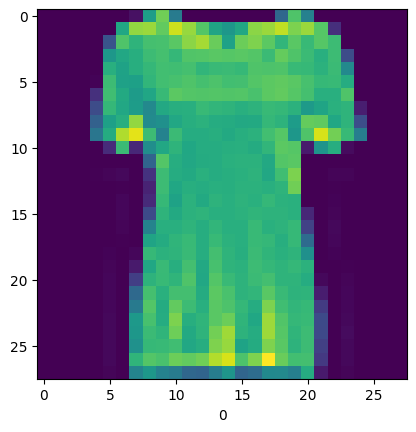

In [24]:
# Visualize sample image with corresponding label
plt.imshow(x_train[10])
plt.xlabel(y_train[10])
plt.show()

In [25]:
# normalize dataset
X_train = x_train/255
X_test = x_test/255

In [32]:
# build model function
def fashion_ann_model():
  model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=x_train[0].shape),
      keras.layers.Dense(units=20, activation='relu'),
      keras.layers.Dense(units=15, activation='sigmoid'),
      keras.layers.Dense(units=10,activation='softmax')
  ])
  model.compile(optimizer=keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [55]:
# train model
def train_ann_fashion_model(x,y):
  model = fashion_ann_model()
  history = model.fit(
      X_train,
      y_train,
      epochs=x,
      validation_data=(X_test,y_test),
      batch_size=y,
      verbose=1
  )
  summary = pd.DataFrame(history.history)
  summary['epoch'] = history.epoch
  return (model,summary)

# run model
history, result = train_ann_fashion_model(11,6)

Epoch 1/11
10000/10000 [==============================] - 34s 3ms/step - loss: 1.0263 - accuracy: 0.6803 - val_loss: 0.6759 - val_accuracy: 0.7799
Epoch 2/11
10000/10000 [==============================] - 33s 3ms/step - loss: 0.5750 - accuracy: 0.8091 - val_loss: 0.5394 - val_accuracy: 0.8166
Epoch 3/11
10000/10000 [==============================] - 33s 3ms/step - loss: 0.4903 - accuracy: 0.8343 - val_loss: 0.5102 - val_accuracy: 0.8271
Epoch 4/11
10000/10000 [==============================] - 31s 3ms/step - loss: 0.4540 - accuracy: 0.8443 - val_loss: 0.4759 - val_accuracy: 0.8364
Epoch 5/11
10000/10000 [==============================] - 33s 3ms/step - loss: 0.4302 - accuracy: 0.8522 - val_loss: 0.4467 - val_accuracy: 0.8457
Epoch 6/11
10000/10000 [==============================] - 31s 3ms/step - loss: 0.4119 - accuracy: 0.8577 - val_loss: 0.4527 - val_accuracy: 0.8411
Epoch 7/11
10000/10000 [==============================] - 33s 3ms/step - loss: 0.3987 - accuracy: 0.8606 - val_loss: 0

In [56]:
# plot visuals of model sumarry
df = pd.DataFrame(result)
df

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.026312,0.680300,0.675920,0.7799,0
1,0.575015,0.809150,0.539367,0.8166,1
2,0.490276,0.834317,0.510153,0.8271,2
3,0.454009,0.844250,0.475879,0.8364,3
4,0.430244,0.852250,0.446717,0.8457,4
5,0.411892,0.857683,0.452694,0.8411,5
6,0.398654,0.860567,0.434819,0.8493,6
7,0.387508,0.864267,0.421495,0.8522,7
8,0.377597,0.867850,0.427567,0.8505,8
9,0.367863,0.870983,0.413133,0.8543,9


<Axes: >

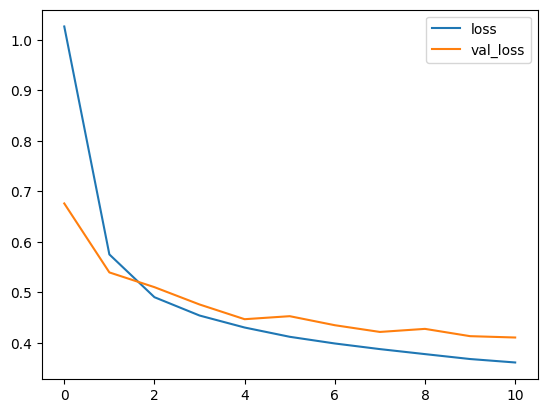

In [57]:
# Plot train vs test data loss
result[['loss','val_loss']].plot()

<Axes: >

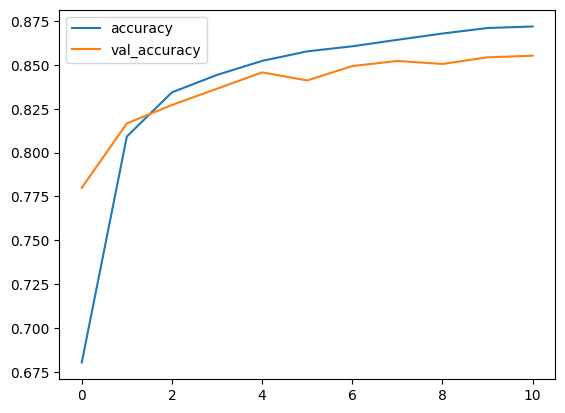

In [58]:
# plot train vs test data accuracy
result[['accuracy', 'val_accuracy']].plot()

In [66]:
# evaluate model
model_evaluate = history.evaluate(X_test, y_test)
print("Test Accuracy :",model_evaluate)

313/313 [==============================] - 1s 2ms/step - loss: 0.4105 - accuracy: 0.8552
Test Accuracy : [0.4104723036289215, 0.8551999926567078]


In [73]:
# predict with model
y_pred = history.predict(X_test)
print("Predicted: ",np.argmax(y_pred[0])), print("Actual Value",y_test[0])

313/313 [==============================] - 1s 2ms/step
Predicted:  9
Actual Value 9


(None, None)

In [67]:
# confusion matrix for model
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=np.argmax(y_pred, axis=1))
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[834,   2,  11,  25,   5,   0, 105,   0,  18,   0],
       [  3, 955,   6,  26,   4,   0,   5,   0,   1,   0],
       [ 20,   1, 761,  13, 158,   1,  43,   0,   3,   0],
       [ 29,  10,  11, 845,  66,   1,  35,   0,   3,   0],
       [  0,   1,  87,  15, 857,   0,  35,   0,   5,   0],
       [  0,   1,   0,   2,   0, 897,   0,  69,   9,  22],
       [158,   1, 120,  29, 128,   0, 543,   0,  21,   0],
       [  0,   0,   0,   0,   0,  13,   0, 975,   0,  12],
       [  1,   1,  10,   9,   3,   2,  10,   7, 957,   0],
       [  0,   0,   0,   0,   0,   4,   0,  67,   1, 928]], dtype=int32)>

Text(141.25, 0.5, 'Actual  digit')

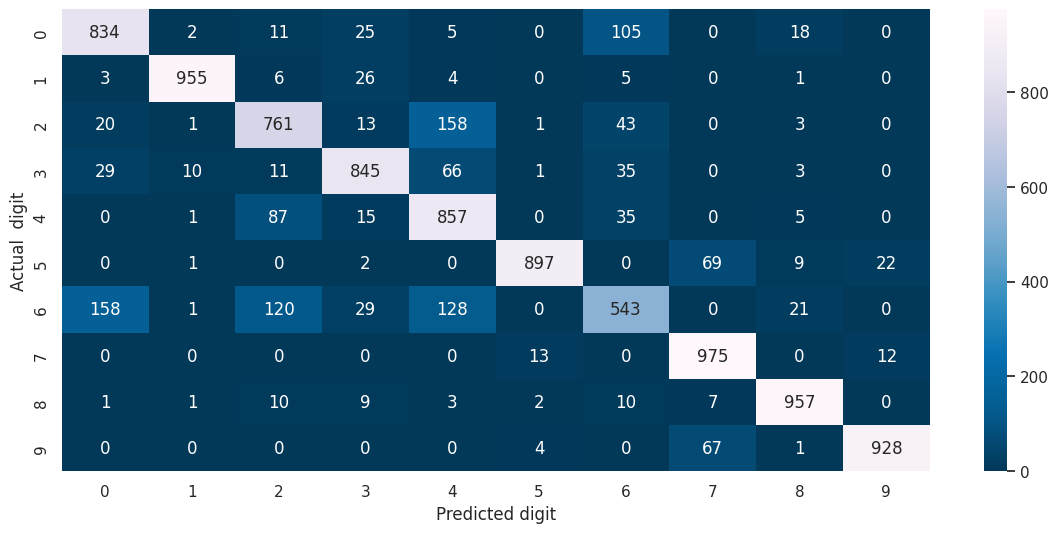

In [71]:
# Plot heatmap for confusion matrix
sns.heatmap(confusion_matrix,annot=True,cmap='PuBu_r',fmt='g')
plt.xlabel("Predicted digit")
plt.ylabel("Actual  digit")

In [ ]:
# Adding many layers effieciently
def model_nlayers(num_neurons, num_layers):
  # build model
  inputs = keras.Input(shape=748) #Input layer
  # first hidden layer
  dense = keras.layers.Dense(num_neurons, activation='relu')#(inputs)
  # customize number of layers and neurons per layer
  for i in range(num_layers - 1):
    dense = keras.layers.Dense(num_neurons, activation='relu')#(dense)
  outputs = keras.layers.Dense(10, activation='softmax')#(dense)
  model = keras.Model(
      inputs=inputs,
      outputs=outputs,
      name='model'
  )
  # Set optimizer and loss
  opt = keras.optimizers.SGD(momentum=0.9,learning_rate=0.0001)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['categorical_accurracy'])
  # train model
  history = model.fit(x_train,y_train,epochs=20,batch_size=20,verbose=1)
  # set performance
  hist = pd.DataFrame(history.history)
  hist['Epoch'] = history.epoch
  return history
layer_5_3 = model_nlayers(4,3)
layer_5_3